In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
Image(url='http://datascience.uci.edu/wp-content/uploads/sites/2/2014/09/data_science_logo_with_image1.png')

## Predictive Modeling with Python - Overfitting, Regularization, Model Selection
#### Author: Kevin Bache
#### Modified by: Preston Hinkle

## Before Lunch:
We created a linear model and saw that it performed well on already seen data but poorly on unseen data.


This session is about creating models that *generalize* to new data.

## Cross validation


What we saw in the previous session was a common setup.  We have $\mathbf{X}$ and $\mathbf{y}$ data from the past and $\mathbf{X}$ data for the present for which we want to **predict** the future $\mathbf{y}$ values.

We can generalize this notion of past/present data into what's generally called *train* and *test* data.

* **Training Data** -- A dataset that we use to train our model.  We have both $\mathbf{X}$ and $\mathbf{y}$

* **Testing Data** -- The data set for which we are trying to predict the correct outputs $y$ on. We use the testing data to evaluate our model's performance, which informs us of how it will perform on future data.

\*\* **Never optimize a model based on predictions of the testing set; it is there for prediction alone!.** \*\*

If it helps, pretend that we do not know the correct $y$s in the testing set; in practice, we do not have the test $y$s.

The method of training a model on one subset of the data and testing it on another is known as **cross-validation**.

## Two important concepts in machine learning:
### <span style="color:green">**1) A predictive model is only as good as its predictions on unseen data **</span>

### <span style="color:green">**2) Error on the dataset we trained on is not a good predictor of error on future data**</span>

- Why? Because when we use data to train a model, we tend to **overfit** the model to that particular set of data

### Overfitting in One Picture

In [2]:
Image(url='http://radimrehurek.com/data_science_python/plot_bias_variance_examples_2.png')

### Model description:
- d = 1: Two parameters: $y = \theta_{0} + \theta_{1}x_{1}$ (intercept + linear term)
- d = 2: Three parameters: $y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}^{2}$ (intercept + linear term + square term)
- d = 6: Seven parameters: $y = \theta_{0} + \theta_{1}x_{1} + ... + \theta_{6}x^{6}$ (intercept + linear term + ... ) a degree 6 polynomial!

### Questions:
- Which of the above 3 models has the least training error?
- Which do you think would have the least error on new data sampled from the same distribution?

## How to Fight Overfitting?

Obviously overfitting weakens our model's predictive power for new data, but how do we prevent it?

There are two linked strategies to accomplish this: **regularization** and **model selection**.

## Regularization
The idea in regularization is that we're going to modify our loss function to penalize it for being too complex. Simple models tend to perform better on new data.

One way to do this is to try to keep our regression coefficients small. Why would we want to do this? One intuitive explanation is that if we have big regression coefficients we'll get large changes in the predicted values from small changes in input value. This led to the erratic behavior of the 6th degree polynomial fit to the data in the above plot. Intuitively, our predictions should vary smoothly with the data.

So a model with smaller coefficients makes smoother predictions.  It is simpler, which means it will have a harder time overfitting. 

We can change our linear regression loss function to help us reduce overfitting:

### Linear Regression Loss Function
\begin{eqnarray*}
    Loss(\beta) = MSE &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat y_i)^2 \\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 \\   
\end{eqnarray*}

### Linear Regression Loss Function __with Regularization__
\begin{eqnarray*}
    Loss(\beta) &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha ||\beta||_2^2\\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \beta^T \beta\\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \sum_{d=1}^D \beta_d^2\\
\end{eqnarray*}

**Important:** $\alpha$ is known as the regularization *hyperparameter*, and it determines how strongly we wish to penalize large parameter values $\|\beta\|^{2}$.

**By the way, there are many types of regularization that can be used; we chose something called 'Ridge Regression' which uses the L$^{2}$ norm (sum of squares).**

We won't get into details, but a ridge regression model can be optimized in much the same way as an unregularized linear regression: either with using some form of gradient descent or matrix-based solutions. 

### <span style="color:red">Understanding the effects of the regularization term</span>
1. Partner up.  On one computer:
  0. Construct the 'mean_squared_error' function, which calculates the average squared-distance of the predicted y-values $\hat{y}$ and the actual y-values $y$ (see MSE above for the formula). You will be using this function throughout the rest of this session, so make sure  it is correct!
  1. Create two linear models in scikitlearn, an unregularized `LinearRegression` model, and a regularized `Ridge` model with regularization parameter $\alpha$ = 1. e.g., `model_ridge = Ridge(alpha = 1)`
  2. *Train* both models on the training data set loaded below, e.g., `model.fit(x_train, y_train)`
  3. *Predict* the output values $y$ for the training and test data set using both of the trained models, e.g., `model.predict(x)`
  4. Calculate the mean squared error of the predictions $\hat{y}$ for the training and test sets using the function defined below
  5. For each model, calculate the norm (square-root of sum of squared elements) $\|\beta\|=\sqrt{\sum_{i}\beta_{i}^{2}}$
      - Hints:
          - `model.coef_` returns a list of the coefficients (list of $\beta$s) of `model`
          - The exponentiation operation (number\**exponent) can act directly on numpy arrays to square each of their elements
          - `np.sum()` returns the sum of all elements in an array. Combine this with the previous hint to easily calculate the parameter vector norm $\|\boldsymbol{\beta}\|$

2. Inspect the training error, test error, and the sums of coefficients for the training and test models.
3. Discuss; what impact did the regularization term have on our model's determined coefficients and its performance?

##### Write the mean squared error calculation

In [3]:
######################################################
# Insert solution below!
######################################################

from sklearn.linear_model import LinearRegression, Ridge

def mean_squared_error(y_true, y_pred):
    """
    calculate the mean_squared_error given a vector of true ys and a vector of predicted ys
    """
    diff = y_true - y_pred
    return np.dot(diff, diff) / len(diff)

##### Load the data

In [4]:
######################################################
# Don't change this!
######################################################

# load overfitting data
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

##### Training and testing two models: an **unregularized** model and a **regularized** model

In [5]:
######################################################
# Insert solution below!
######################################################

###################
# Linear regression
###################

# Train


# Predict


# Get errors, coefficients


##################
# Ridge regression
##################

# Train


# Predict


# Get errors, coefficients



LinearRegression():
	Mean-squared error (train) 2.48354216239e-05
	Mean-squared error (test) 283.527287922
	Coefficients: 17.6105448353

Ridge(alpha = 1):
	Mean-squared error (train) 0.018634112598
	Mean-squared error (test) 9.56415606837
	Coefficients: 4.71067459095



### Regularization is awesome!

If the above steps were completed correctly, then you should have created and trained a *regularized* model that had less error on the test set than the *unregularized* model. Great job!

Regularization is clearly a very powerful technique, but the above exercise raises some questions...

### Model selection

- How do we choose $\alpha$? The regularized model with $\alpha=1$ was an improvement upon the unregularized model, but the value was arbitrarily chosen---surely we can do better.

- One option is to try a range of $\alpha$ values and select the one that yields the least error.

- But, remember: ** we are *not* allowed to optimize our model based on the test set!** This restriction extends to hyperparameters such as $\alpha$!

- So what do we do? We need a way of validating $\alpha$ choices, but we aren't allowed to use performance on the test data to make this decision, and the training error is no use here either...

- Solution: Partition the *training dataset* into two new sets, a new *training dataset* and a *validation dataset*, and choose the parameter $\alpha$ which yields the lowest error on the validation set!

- This process is one type of **model selection** that can be used to determine the best hyperparameters to move forward with

- Let's see what hyperparameter selection based on validation error looks like:


### <span style="color:red">Exercise: Choosing the optimal hyperparameter value $\alpha$ with cross-validation</set>
1. Partner up. On one computer:
  1. Partition the training data set into a new training set and a validation set (this is done for you, just run the cell below)
  2. Train 12 models with regularization parameters $\alpha$ in {0, 1, 2, 4, 8, ..., 512, 1024} (powers of 2)
  3. Using the `mean_squared_error` function written above, calculate the training error, validation error, test error, and the norm of the coefficient vectors $\|\beta\|$ for each model. 
  4. **Store the values in lists named as follows:**
    - 'train_errors'
    - 'validation_errors'
    - 'test_errors' 
    - 'coef_mags'
    
   - **Hints: **
     - Some of the code is provided for you
    - We can train a non-regularized Linear Regression model using Ridge(alpha = 0); no need to distinguish between Ridge(alpha = 0) and LinearRegression()
    - Lists and list comprehension are *very* useful here.
        - Create a `list` of all the alpha values, called alphas: `alphas=[0, 1, 2, ..., 1024]`
        - Create a `list` of models like so: `models=[linear_model.Ridge(alpha) for alpha in alphas]`
        - Iterate over every model in a `for` loop, calculating the errors and coefficients and appending them to their respective
 
2. Inspect the relationship between $\alpha$ and the train error, validation error, test error, and coefficient magnitudes. Describe what is happening to each as $\alpha$ is dialed up.

3. Which $\alpha$ value works best?

##### Load data, create train and validation splits

In [6]:
######################################################
# Don't change this!
# Just evaluate this cell.
######################################################

# load overfitting data into 'train' and 'test' sets
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

# split the 'train' set into 'train' and 'validation' sets
from sklearn.cross_validation import train_test_split
validation_portion = 0.1
seed = 1
x_train, x_valid, y_train, y_valid = \
    train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed)

/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Train, test models with varying alpha

In [7]:
######################################################
# Insert solution below!
######################################################

# Define alpha hyperparameters
alphas = [0]+[2**i for i in range(0,11)]

# Create Ridge models with all alpha values
models = [Ridge(alpha) for alpha in alphas]

# Create empty lists for errors, coefficient magnitudes to append to
train_errors = []
valid_errors = []
test_errors = []
coef_mags = []

for model in models:
    
    # Fit the model to the training data

    
    
    # Predict the outputs y for the training, validation, and test data
    
    
    
    
    # Calculate the mean-squared error of each set of predictions, and append to the appropriate lists
    
    
    
    
    # Calculate the norm of the coefficient vector and append to list
    coef_mags.append(np.sum(np.abs(np.dot(model.coef_, model.coef_))))
    
print 'training errors:' 
for i, model in enumerate(models):
    print '\talpha = ', alphas[i], '\t', round(train_errors[i],3)
    
print '\nvalidation errors:' 
for i, model in enumerate(models):
    print '\talpha = ', alphas[i], '\t', round(valid_errors[i],3)
print '\t**Best alpha**', alphas[np.argmin(valid_errors)]
    
print '\ntest errors:' 
for i, model in enumerate(models):
    print '\talpha = ', alphas[i], '\t', round(test_errors[i],3)
    
print '\ncoefficients:' 
for i, model in enumerate(models):
    print '\talpha = ', alphas[i], '\t', round(coef_mags[i],3)

/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


training errors:
	alpha =  0 	0.0
	alpha =  1 	0.002
	alpha =  2 	0.004
	alpha =  4 	0.011
	alpha =  8 	0.026
	alpha =  16 	0.057
	alpha =  32 	0.123
	alpha =  64 	0.267
	alpha =  128 	0.581
	alpha =  256 	1.235
	alpha =  512 	2.455
	alpha =  1024 	4.383

validation errors:
	alpha =  0 	11.704
	alpha =  1 	10.19
	alpha =  2 	9.326
	alpha =  4 	8.335
	alpha =  8 	7.392
	alpha =  16 	6.639
	alpha =  32 	6.133
	alpha =  64 	5.887
	alpha =  128 	5.92
	alpha =  256 	6.303
	alpha =  512 	7.146
	alpha =  1024 	8.493
	**Best alpha** 64

test errors:
	alpha =  0 	9.026
	alpha =  1 	7.708
	alpha =  2 	7.011
	alpha =  4 	6.287
	alpha =  8 	5.708
	alpha =  16 	5.384
	alpha =  32 	5.351
	alpha =  64 	5.638
	alpha =  128 	6.299
	alpha =  256 	7.39
	alpha =  512 	8.913
	alpha =  1024 	10.73

coefficients:
	alpha =  0 	61.895
	alpha =  1 	56.393
	alpha =  2 	53.092
	alpha =  4 	49.258
	alpha =  8 	45.597
	alpha =  16 	42.351
	alpha =  32 	39.239
	alpha =  64 	36.191
	alpha =  128 	32.937
	alpha =  256

### Now, let's plot the results!
- Evaluate the cell below and inspect the figure that is produced.
- *psst* did you name your lists correctly? Re-read the instructions above if the following doesn't evaluate!

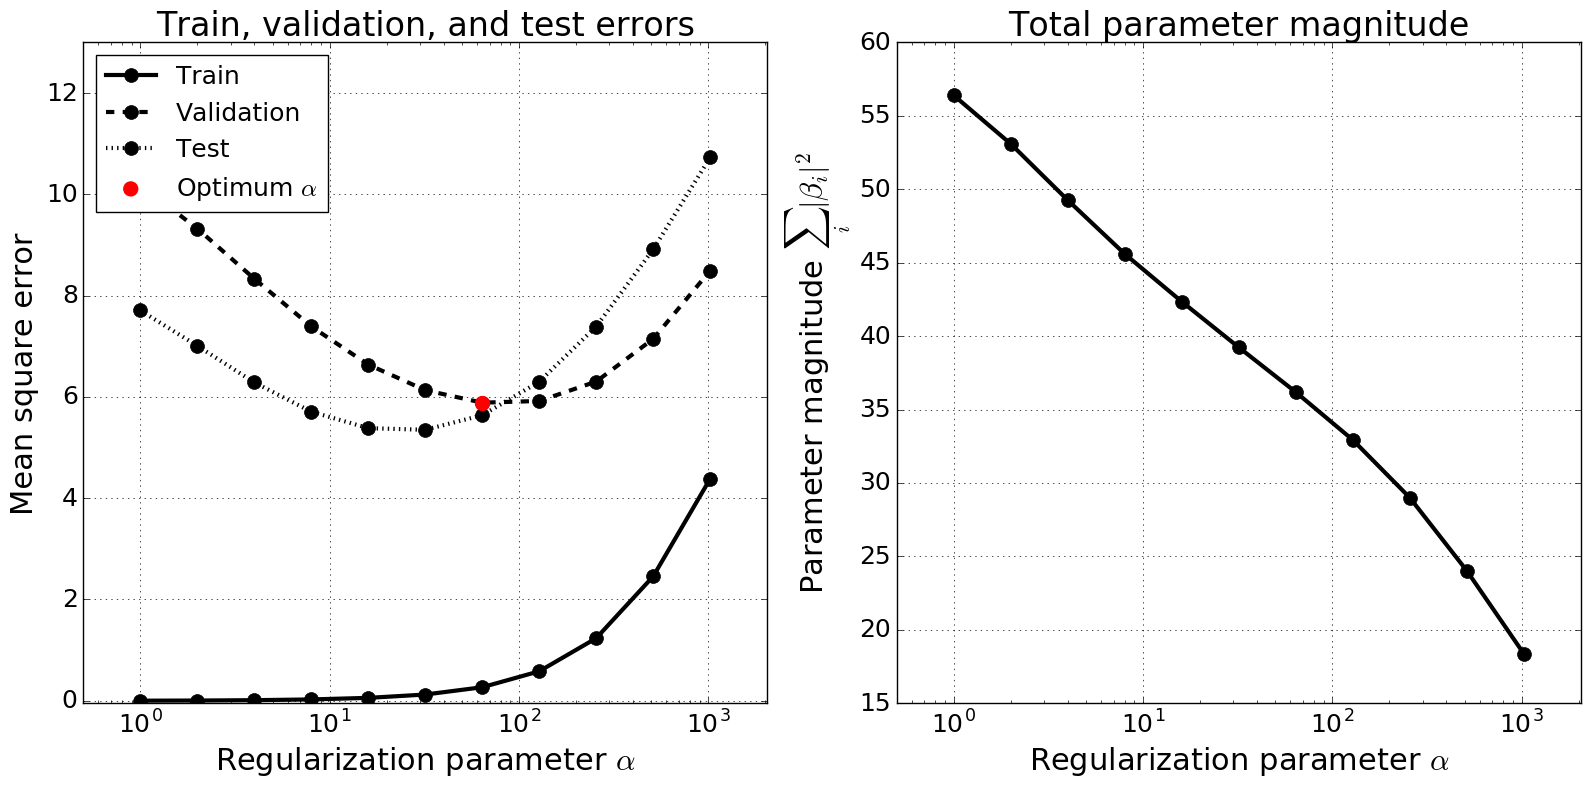

In [8]:
###### Don't change this!
######################################################

# Set up figure
fig, axes = plt.subplots(1, 2, figsize = (16,8))

# First plot
plt.sca(axes[0])

plt.semilogx(alphas[1:], train_errors[1:], lw = 3, label = 'Train', color = 'k', marker = 'o', markersize = 10)
plt.semilogx(alphas[1:], valid_errors[1:], lw = 3, label = 'Validation', color = 'k', ls = '--', marker = 'o', markersize = 10, zorder = 3)
plt.semilogx(alphas[1:], test_errors[1:], lw = 3, label = 'Test', color = 'k', ls = ':', marker = 'o', markersize = 10, zorder = 2)

# Minimum scatter point
plt.scatter(alphas[1+np.argsort(np.array(valid_errors[1:]))[0]], min(valid_errors), color = 'red', marker = 'o', s = 100, zorder = 4, label = r'Optimum $\alpha$')

plt.xlim(.5, 2056)
plt.ylim(-.05,13)

plt.title('Train, validation, and test errors', size = 24)
plt.xlabel(r'Regularization parameter $\alpha$', size = 22)
plt.ylabel(r'Mean square error', size = 22)

plt.legend(fontsize = 18, loc = 'upper left', numpoints=1, scatterpoints=1)
plt.grid()
plt.tick_params(labelsize = 18)

# Second plot
plt.sca(axes[1])
plt.semilogx(alphas[1:], coef_mags[1:], lw = 3, color = 'k', marker = 'o', markersize = 10)
plt.xlim(.5, 2056)


plt.title('Total parameter magnitude', size = 24)
plt.xlabel(r'Regularization parameter $\alpha$', size = 22)
plt.ylabel(r'Parameter magnitude $\sum_{i}|\beta_{i}|^{2}$', size = 22)

plt.grid()
plt.tick_params(labelsize = 18)



# Save, show
fig.tight_layout()
#plt.savefig('../figures/session_2/alpha_significance.png')
plt.show()

### Discuss the above plots
- In the remaining time, here are some things to think about:
    - What happens to the training error as we dial up $\alpha$?
    - The optimum value of $\alpha$ is given by the location of the minimum in the validation curve. Are models to the left overfit or underfit? to the right?
    - How is the right plot explained in terms of the Ridge loss function?
$$Loss\left(\beta\right)=\frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \sum_{d=1}^D \beta_d^2$$

## Cross validation

- Using regularization with varying values of the *hyperparameter* $\alpha$ above gave us a good way of selecting which $\alpha$ to choose in our final model
- However, we *still* can do better!
- Why? We overfit our regularization hyper parameter $\alpha$ to the validation set!
- Remember, we calculated the validation error for each $\alpha$ and choose the $\alpha$ which minimized that error; if the validation data had been even *slightly* different, we might have chosen a different optimal value of $\alpha$
- As a demonstration, evaluate the cells below and inspect the figure that is produced

### Generating the plot

In [9]:
######################################################
# Don't change this!
######################################################

# load overfitting data into 'train' and 'test' sets
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

# split the 'train' set into 'train' and 'validation' sets
from sklearn.cross_validation import train_test_split
validation_portion = 0.1
seed_1 = 1234
seed_2 = 7890
x_train_1, x_valid_1, y_train_1, y_valid_1 = \
    train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed_1)
x_train_2, x_valid_2, y_train_2, y_valid_2 = \
    train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed_2)

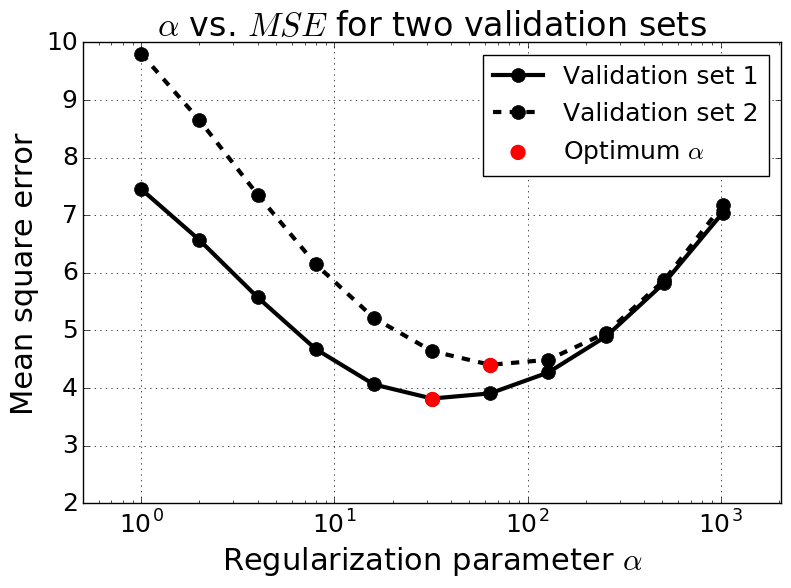

In [10]:
######################################################
# Don't change this!
######################################################

alphas = sorted([0]+[2**i for i in range(0,11)])



# Set up figure
fig = plt.figure(figsize = (8,6))

lines = ['-', '--']

# Loop over 2 validation sets
for j, (x_train, y_train, x_valid, y_valid) in enumerate([(x_train_1, y_train_1, x_valid_1, y_valid_1),
                                          (x_train_2, y_train_2, x_valid_2, y_valid_2)]):

    models = [Ridge(alpha) for alpha in alphas]
    
    valid_errors = []

    # Loop over all models
    for model in models:
        
        # Fit the model to the training data
        model.fit(x_train, y_train)

        # Predict the outputs y for the training, validation, and test data
        y_train_pred = model.predict(x_train)
        y_valid_pred = model.predict(x_valid)
        

        # Calculate the mean-squared error of each set of predictions, and append to the appropriate lists
        valid_errors.append(mean_squared_error(y_valid, y_valid_pred))

        # Calculate the norm of the coefficient vector and append to list
        coef_mags.append(np.sum(np.abs(model.coef_)))

    

    plt.semilogx(alphas[1:], valid_errors[1:], lw = 3, label = 'Validation set '+str(j+1), color = 'k', ls = lines[j], marker = 'o', markersize = 10)
    plt.scatter(alphas[np.argmin(valid_errors)], np.min(valid_errors), color = 'red', s = 100, zorder = 3)

# Dummy scatter call for optimum alpha in legend
plt.scatter([],[], s = 100, color = 'red', label = r'Optimum $\alpha$')
    
plt.xlim(.5, 2056)
plt.ylim(2,10)


# Plot cosmetics

plt.title(r'$\alpha$ vs. $MSE$ for two validation sets', size = 24)
plt.xlabel(r'Regularization parameter $\alpha$', size = 22)
plt.ylabel(r'Mean square error', size = 22)

plt.legend(fontsize = 18, loc = 'upper right', numpoints=1, scatterpoints=1)
plt.grid()
plt.tick_params(labelsize = 18)

fig.tight_layout()

#plt.savefig('../figures/session_2/alpha_variance.png')

plt.show()

- The plot shows that there can be significant **variance** in the optimum $\alpha$ as determined by cross-validation
- How do we overcome this dilemma?

### K-Folds cross-validation
- Here's an idea: Instead of restricting ourselves to one train/validation split, let's use multiple splits, and find which $\alpha$ performs best *on average*
- There are many ways of creating multiple training/validation splits, but we're going to use a method called **k-folds cross-validation**
- Here's how it works:

    1. Partition the training data into K subsets, or **folds**
    2. For each fold k in 1 to K:
        1. Train the model on all the data outside of fold k
        2. Calculate the model's error on the data in fold k
    3. Average the error for each $\alpha$, and choose $\hat{\alpha}$ to be the $\alpha$ with least error *on average*
    4. The average error for $\alpha=\hat{\alpha}$ is our best estimate for the test and future error.

In [11]:
Image(url='https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png')

* **Good:** Only wastes 100/k% of the data at a time
* **Bad:** Takes k times long as just training one model, still wastes 100/k% of the data

##### sklearn.cross_validation.KFold example

In [12]:
######################################################
# Don't change this!
######################################################

# scikit learn provides a useful object to help you perform kfold cross validation
from sklearn.cross_validation import KFold

n_data = len(y_train)
fold_count = 0
for train_reduced_row_ids, valid_row_ids in KFold(n_data, n_folds=4):
    print
    print
    print("FOLD %d:" % fold_count)
    print("-------")
    print("train_ids:\n%s\n\nvalid_ids\n%s" % (train_reduced_row_ids, valid_row_ids))
    x_train_reduced = x_train[train_reduced_row_ids]
    y_train_reduced = y_train[train_reduced_row_ids]
    x_valid = x_train[valid_row_ids]
    y_valid = y_train[valid_row_ids]
    fold_count += 1



FOLD 0:
-------
train_ids:
[135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 3

#### <span style="color:red">K-Fold Cross Validation Exercise</span>
1. Partner up.  On one computer, perform K-Fold cross validation:
    1. Create the train/validation split indices (this is done for you in the below cell, just run it!)
    2. For each alpha in [8, 16, 32, 64, 128]:
        1. Create a Ridge model with regularization parameter alpha
        2. For each training/validation split
            1. *Train* the Ridge model on the training data
            2. *Test* the model on the validation data
            3. Keep a running tally of the *average* validation error
    3. Compare the *average* error for each alpha; determine the optimum value of alpha.
    4. Is the optimum alpha from K-Folds the same as the alpha found above using a single training/test split?
    5. After determining the optimum alpha, train a model Ridge(alpha = best_alpha) on the entire training set (combined training and validation) and calculate the test error

##### Load the training, test data; create the folds

In [13]:
######################################################
# Don't change this!
######################################################

# load overfitting data into 'train' and 'test' sets
with np.load('data/overfitting_data.npz') as data:
    x_train_validation = data['x_train']
    y_train_validation = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

# Shuffle the training data in unison
from sklearn.utils import shuffle
x_train_validation, y_train_validation = shuffle(x_train_validation, y_train_validation, random_state = 1)

# Create folds
K = 4
folds = KFold(x_train_validation.shape[0], n_folds = K)

In [14]:
######################################################
# Insert solution below
######################################################

alphas = [2**i for i in range(3, 8)    # 8, 16, ...

# List of average validation error for each alpha
avg_validation_errors = [0 for i in range(len(alphas))]

          
# Loop over alpha
for i, alpha in enumerate(alphas):
    model = Ridge(alpha)
          
    
    # Loop over all K folds
    for train_rows, valid_rows in folds:
        # Get training data and features
       
          
        
        # Get validation data and features
        
        
        
        # Fit model, make predictions on validation set, add to the validation error
        
        
        
        
print 'alpha\t\tavg. validation error'
print '-----\t\t----------------'
for i in range(len(alphas)):
    print alphas[i], '\t\t', avg_validation_errors[i]

alpha		avg. validation error
-----		----------------
8 		6.34940873591
16 		6.15203887953
32 		6.07300411407
64 		6.21522766859
128 		6.64920010844


##### Calculating the test terror

In [15]:
# Reload the data

# load overfitting data into 'train' and 'test' sets
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [16]:
best_alpha =    # Pick alpha that had lowest *average* validation error
model = Ridge(alpha=best_alpha)
model.fit(x_train, y_train)
y_test_predict = model.predict(x_test)

print("Test error")
print(mean_squared_error(y_test, y_test_predict))

Test error
4.54839062215


## Summary:
* We're primarily interested in predictive performance on unseen data, not on seen data.
* **Training error** estimates error on **seen** data
* **Cross validation error** estimates error on **unseen** data
* **Regularization** adds an additional term to our **loss function** that penalized parameter squared-magnitude $\|\boldsymbol{\beta}\|^{2}$. The **hyperparameter** $\alpha$ tunes the relative contribution of this penalty term to the residual sum of squares term $\sum_{i}\left(y_{i}-X_{i}^{T}\beta\right)^{2}$
* We discussed one type of regularization, **Ridge Regression**, but there are many other possibilities with their own advantages
  * **Ridge Regression**: $\alpha\sum_{i}\|\beta_{i}\|^{2}$    ('L2 penalty')
  * **LASSO**: $\alpha\sum_{i}\|\beta_{i}\|$    ('L1 penalty')
  * **ElasticNet**: $\alpha_{\text{RR}}\sum_{i}\|\beta_{i}\|^{2}+\alpha_{\text{LASSO}}\sum_{i}\|\beta_{i}\|$    (Combination of Ridge and Lasso)
* We talked about two kinds of cross validation error:
  * **Validation Error** -- split your training set into a reduced training set and a validation set
  * **K-Fold Error** -- Split your training data into k reduced training sets and a validation sets
* Regularization introduces new hyperparameters
* Use a cross validated estimate of future performance to choose your model and hyperparameter settings

### Extra
- In the remaining time, let's explore the differences between Ridge and LASSO regression
- Just evaluate the code cells
- Inspect the generated plot. Do you observe a difference between the strategies of Ridge and LASSO towards regularization? Discuss.

##### Load data

In [17]:
from sklearn.linear_model import Ridge, Lasso

# load overfitting data into 'train' and 'test' sets
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

##### Train Ridge and LASSO models with different alpha, and keep track of parameter magnitudes of each model

In [18]:
# Ridge
alphas_ridge = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 5096]
coefs_ridge = np.zeros((len(alphas_ridge), 3))

for i, alpha in enumerate(alphas_ridge):
    ridge_model = Ridge(alpha = alpha)
    
    
    ridge_model.fit(x_train, y_train)
                    
    coefs_ridge[i,:] = ridge_model.coef_[:3]
    
    
# Lasso
alphas_lasso = [.01, .03, .06, .1, .3, .6, 1, 3, 10]
coefs_lasso = np.zeros((len(alphas_lasso), 3))

for i, alpha in enumerate(alphas_lasso):
    lasso_model = Lasso(alpha = alpha)
    
    lasso_model.fit(x_train, y_train)
    
    coefs_lasso[i,:] = lasso_model.coef_[:3]

##### Plotting the difference

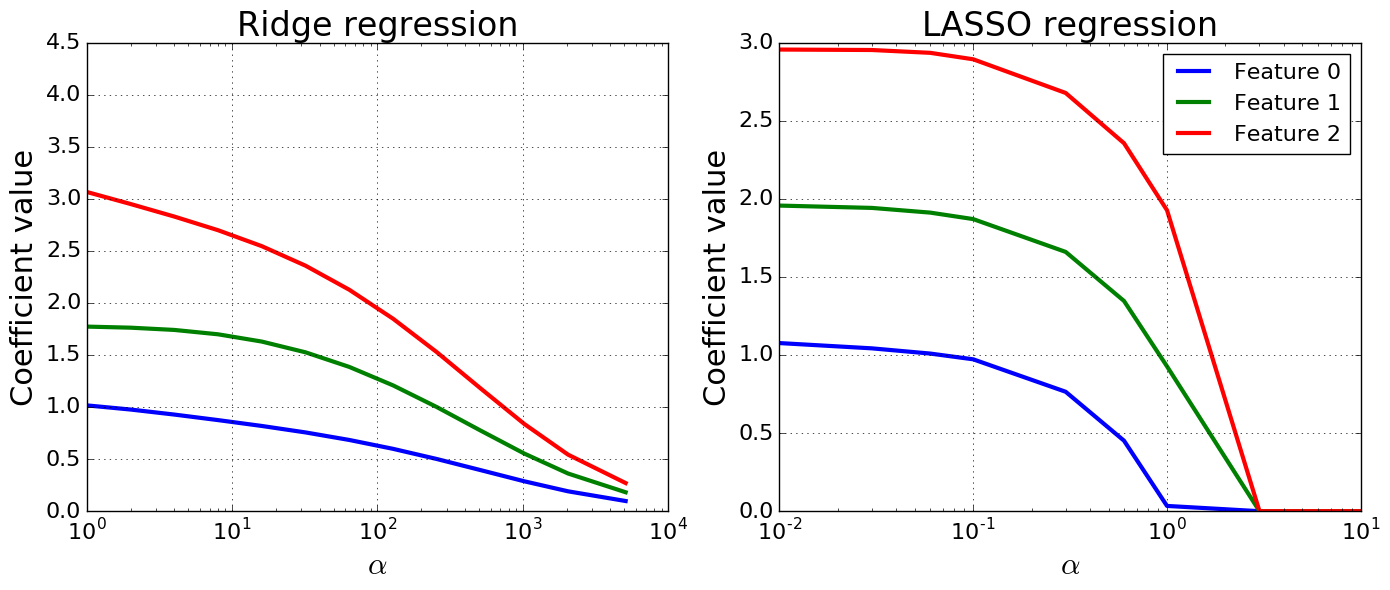

In [19]:
# Set up figure
fig, axes = plt.subplots(1,2, figsize=(14,6))

# Ridge plot
plt.sca(axes[0])
for i, param in enumerate(coefs_ridge.T):
    plt.semilogx(alphas_ridge, param, lw = 3)

plt.title('Ridge regression', size = 24)
plt.xlabel(r'$\alpha$', size = 22)
plt.ylabel(r'Coefficient value', size = 22)
plt.grid()
plt.tick_params(labelsize = 16)
    
# Lasso plot
plt.sca(axes[1])
for i, param in enumerate(coefs_lasso.T):
    plt.semilogx(alphas_lasso, param, lw = 3, label = r'Feature ' + str(i))
    
plt.title('LASSO regression', size = 24)
plt.xlabel(r'$\alpha$', size = 22)
plt.ylabel(r'Coefficient value', size = 22)
plt.grid()
plt.tick_params(labelsize = 16)
plt.legend(loc = 'upper right', fontsize = 16)
    
# Save, display plot
fig.tight_layout()
#plt.savefig('../figures/session_2/ridge_LASSO.png')
    
plt.show()